<img src="./images/banner.png" width="800">

## <a id='toc1_'></a>[Introduction](#toc0_)

In our previous lecture, we explored the basic gradient descent algorithm, its fundamental principles, and some of the challenges it faces. While basic gradient descent is powerful, it has limitations that can hinder its effectiveness in certain scenarios. This lecture introduces several variants of gradient descent that address these limitations and offer improved performance in various contexts.


Before we dive into the variants, let's quickly recap the key points of basic gradient descent:

1. **Objective**: Minimize a cost function by iteratively moving in the direction of steepest descent.
2. **Update Rule**: $\theta = \theta - \alpha \nabla J(\theta)$, where $\theta$ are the parameters, $\alpha$ is the learning rate, and $\nabla J(\theta)$ is the gradient of the cost function.
3. **Challenges**: 
   - Computationally expensive for large datasets
   - Sensitive to learning rate choice
   - Can be slow to converge in certain scenarios


The variants we'll discuss in this lecture are motivated by several factors:

1. **Computational Efficiency**: Processing large datasets more effectively.
2. **Convergence Speed**: Reaching the optimum faster, especially in challenging loss landscapes.
3. **Generalization**: Improving the model's ability to perform well on unseen data.
4. **Escaping Local Minima**: Enhancing the algorithm's ability to find global optima.


In this lecture, we'll cover the following variants:

1. **Stochastic Gradient Descent (SGD)**: Uses a single training example per iteration.
2. **Mini-batch Gradient Descent**: Strikes a balance between basic GD and SGD.
3. **Momentum**: Accelerates convergence and helps with local minima.
4. **Nesterov Accelerated Gradient (NAG)**: A "look-ahead" version of momentum.


Each of these variants builds upon the basic gradient descent algorithm, addressing specific challenges and offering unique advantages. As we explore these methods, consider how they might be applied to different types of machine learning problems and datasets.


By understanding these variants, you'll be better equipped to choose the right optimization algorithm for your specific machine learning tasks, leading to more efficient training and potentially better model performance.


Let's begin our journey into these powerful extensions of the gradient descent algorithm.

**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Stochastic Gradient Descent (SGD)](#toc2_)    
  - [Mathematical Representation](#toc2_1_)    
  - [Advantages](#toc2_2_)    
  - [Challenges](#toc2_3_)    
  - [Visualization](#toc2_4_)    
  - [Use Cases](#toc2_5_)    
  - [Key Takeaways](#toc2_6_)    
- [Mini-batch Gradient Descent](#toc3_)    
  - [Mathematical Representation](#toc3_1_)    
  - [Choosing Batch Size](#toc3_2_)    
  - [Advantages and Challenges](#toc3_3_)    
  - [Visualization](#toc3_4_)    
  - [Intuitive Example and Key Takeaways](#toc3_5_)    
- [Momentum](#toc4_)    
  - [Mathematical Representation](#toc4_1_)    
  - [Physics Analogy](#toc4_2_)    
  - [Advantages and Challenges](#toc4_3_)    
  - [Visualization](#toc4_4_)    
  - [Intuitive Example and Key Takeaways](#toc4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc2_'></a>[Stochastic Gradient Descent (SGD)](#toc0_)

Stochastic Gradient Descent (SGD) is a popular variant of gradient descent that addresses some of the computational challenges associated with the basic algorithm, particularly when dealing with large datasets.


In contrast to basic gradient descent also known as batch gradient descent (BGD) or vanilla gradient descent, which computes the gradient using the entire dataset in each iteration, SGD approximates the gradient using a single randomly selected example.


**Algorithm:**
1. Randomly shuffle the dataset
2. For each iteration:
   - Select a single example $(x_i, y_i)$ from the dataset
   - Compute the gradient of the loss function for this example
   - Update the parameters: $\theta = \theta - \alpha \nabla J(\theta; x_i, y_i)$


Let's consider a simple, intuitive example to illustrate the difference between SGD and BGD:

**Scenario**: Imagine you're a chef trying to perfect a soup recipe. Your goal is to find the ideal amount of salt that pleases the most customers.

**Basic Gradient Descent (BGD) Approach**:
- You make a large pot of soup.
- You ask all 100 customers to taste it and give feedback.
- Based on the average feedback, you adjust the amount of salt.
- You repeat this process, making a new pot each time, until you find the optimal amount of salt.


**Stochastic Gradient Descent (SGD) Approach**:
- You make individual servings of soup.
- For each serving, you ask just one random customer to taste and give feedback.
- You immediately adjust the salt based on this single customer's feedback.
- You repeat this process, making and adjusting individual servings, until you converge on the right amount of salt.


**Key Differences**:
1. **Speed**: SGD (individual servings) allows for much quicker iterations compared to BGD (large pots).
2. **Noise**: SGD's feedback is noisier (one customer might like more salt than average), while BGD's feedback is more stable (average of 100 customers).
3. **Adaptability**: SGD can quickly adapt to new customers, while BGD is slower to incorporate new preferences.


**Analogy to Machine Learning**:
- The soup recipe represents the model parameters.
- The amount of salt represents a specific parameter we're optimizing.
- Customers represent training examples.
- Customer feedback represents the loss for each example.


This analogy highlights why SGD is often preferred for large datasets: it allows for much faster iterations and can adapt more quickly to new data, at the cost of noisier updates.

### <a id='toc2_1_'></a>[Mathematical Representation](#toc0_)


For a dataset with $n$ examples, the update rule for SGD is:

$$\theta = \theta - \alpha \nabla J_i(\theta)$$

Where $J_i(\theta)$ is the loss for the $i$-th training example.


### <a id='toc2_2_'></a>[Advantages](#toc0_)


1. **Computational Efficiency**: Much faster per iteration, especially for large datasets.
2. **Online Learning**: Can handle streaming data or very large datasets that don't fit in memory.
3. **Escape Local Minima**: The noise in updates can help escape shallow local minima.
4. **Regularization Effect**: The noisy updates can have a regularizing effect, potentially improving generalization.


### <a id='toc2_3_'></a>[Challenges](#toc0_)


1. **High Variance**: Updates can be noisy, leading to erratic convergence behavior.
2. **Sensitive to Feature Scaling**: Like basic GD, SGD is sensitive to the scaling of input features.
3. **Learning Rate Tuning**: Requires careful tuning of the learning rate for optimal performance.


### <a id='toc2_4_'></a>[Visualization](#toc0_)


Here's a simple visualization comparing SGD to basic gradient descent:


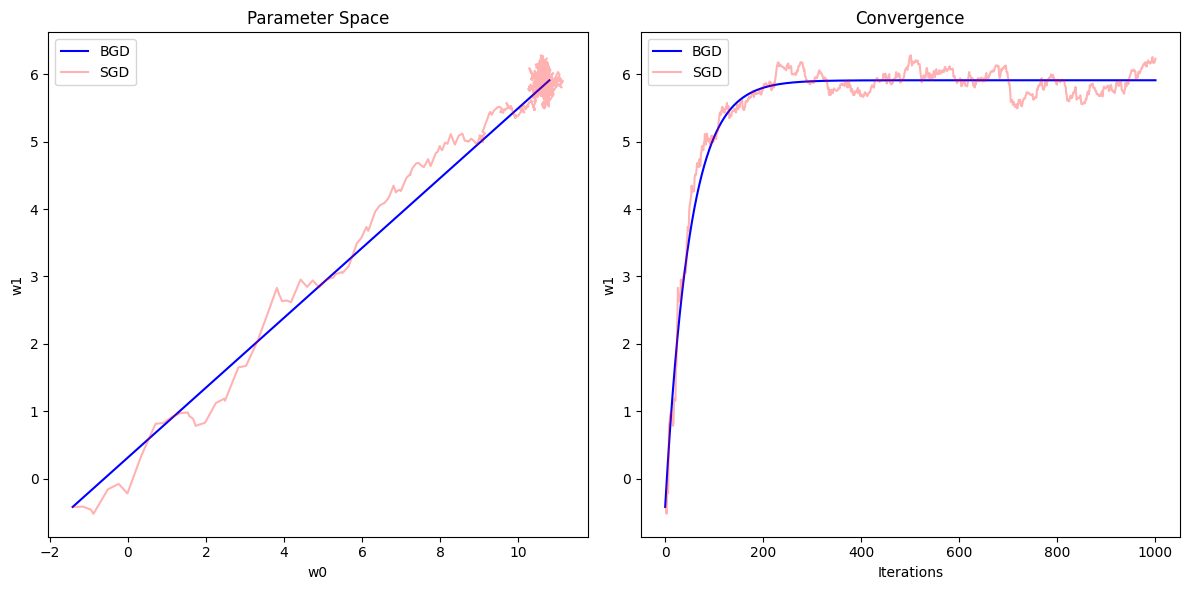

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2

# Normalize the data
X = (X - X.mean()) / X.std()

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
w = np.random.randn(2)

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Batch Gradient Descent
def bgd(X, y, w, learning_rate, n_iterations):
    w_history = [w.copy()]
    for _ in range(n_iterations):
        gradient = 2/len(y) * X.T.dot(X.dot(w) - y)
        w -= learning_rate * gradient
        w_history.append(w.copy())
    return np.array(w_history)

# Stochastic Gradient Descent
def sgd(X, y, w, learning_rate, n_iterations):
    w_history = [w.copy()]
    for _ in range(n_iterations):
        idx = np.random.randint(0, len(y))
        xi, yi = X[idx], y[idx]
        gradient = 2 * xi * (xi.dot(w) - yi)
        w -= learning_rate * gradient
        w_history.append(w.copy())
    return np.array(w_history)

# Run BGD and SGD
bgd_history = bgd(X, y, w.copy(), learning_rate, n_iterations)
sgd_history = sgd(X, y, w.copy(), learning_rate, n_iterations)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(bgd_history[:, 0], bgd_history[:, 1], 'b-', label='BGD')
plt.plot(sgd_history[:, 0], sgd_history[:, 1], 'r-', alpha=0.3, label='SGD')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Parameter Space')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(n_iterations+1), bgd_history[:, 1], 'b-', label='BGD')
plt.plot(np.arange(n_iterations+1), sgd_history[:, 1], 'r-', alpha=0.3, label='SGD')
plt.xlabel('Iterations')
plt.ylabel('w1')
plt.title('Convergence')
plt.legend()

plt.tight_layout()
plt.show()


### <a id='toc2_5_'></a>[Use Cases](#toc0_)


SGD is particularly useful in:
- Large-scale machine learning problems
- Online learning scenarios
- Deep learning, often with mini-batches (which we'll cover next)


### <a id='toc2_6_'></a>[Key Takeaways](#toc0_)


- SGD trades off exact gradient computation for speed and scalability.
- It introduces noise in the optimization process, which can be both beneficial (escaping local minima) and challenging (erratic convergence).
- SGD is foundational for many modern optimization algorithms in machine learning.


Understanding SGD is crucial as it forms the basis for many advanced optimization techniques used in deep learning and other large-scale machine learning applications.

## <a id='toc3_'></a>[Mini-batch Gradient Descent](#toc0_)

Mini-batch Gradient Descent is a variant that strikes a balance between the efficiency of Stochastic Gradient Descent (SGD) and the stability of Batch Gradient Descent (BGD). It's widely used in practice, especially in deep learning applications.


Mini-batch Gradient Descent divides the training dataset into small batches and performs an update for each of these batches. This approach combines the advantages of SGD and BGD.


**Algorithm:**
1. Divide the training dataset into mini-batches of size m (where m is smaller than the full dataset size but larger than 1)
2. For each epoch:
   - For each mini-batch:
     - Compute the gradient of the loss function for the mini-batch
     - Update the parameters: $\theta = \theta - \alpha \nabla J(\theta; X^{(i:i+m)}, Y^{(i:i+m)})$


### <a id='toc3_1_'></a>[Mathematical Representation](#toc0_)


For a dataset with n examples divided into mini-batches of size m, the update rule is:

$$\theta = \theta - \alpha \nabla J(\theta; X^{(i:i+m)}, Y^{(i:i+m)})$$

Where $X^{(i:i+m)}$ and $Y^{(i:i+m)}$ represent the input features and target values for the current mini-batch.


### <a id='toc3_2_'></a>[Choosing Batch Size](#toc0_)


Selecting the right batch size is crucial and depends on various factors:

- **Small batch sizes** (e.g., 32, 64): Faster learning, but noisier gradient estimates
- **Large batch sizes** (e.g., 256, 512): More stable gradient estimates, but slower learning
- **Practical considerations**: Memory constraints, parallelization capabilities


Common batch sizes in practice range from 32 to 256, but this can vary based on the specific problem and available computational resources.


### <a id='toc3_3_'></a>[Advantages and Challenges](#toc0_)


Mini-batch Gradient Descent offers several benefits, but also comes with its own set of challenges:

1. **Efficiency vs. Stability**
   - ✅ More computationally efficient than BGD, especially for large datasets
   - ✅ More stable convergence compared to SGD
   - ❗ Requires balancing batch size: too small can lead to noisy updates, too large can slow down learning

2. **Generalization and Performance**
   - ✅ Often leads to better generalization than BGD
   - ✅ Can leverage matrix optimizations and GPU acceleration for faster processing
   - ❗ Performance gains may plateau or diminish with very large batch sizes

3. **Implementation Considerations**
   - ✅ Allows for parallelization and distributed computing
   - ❗ Needs careful tuning of both learning rate and batch size
   - ❗ Can be memory-intensive for very large models or batch sizes

4. **Adaptability**
   - ✅ More adaptable to new data compared to BGD
   - ❗ Less adaptable than SGD for non-stationary problems


### <a id='toc3_4_'></a>[Visualization](#toc0_)


Here's a simple visualization comparing mini-batch GD to BGD and SGD:


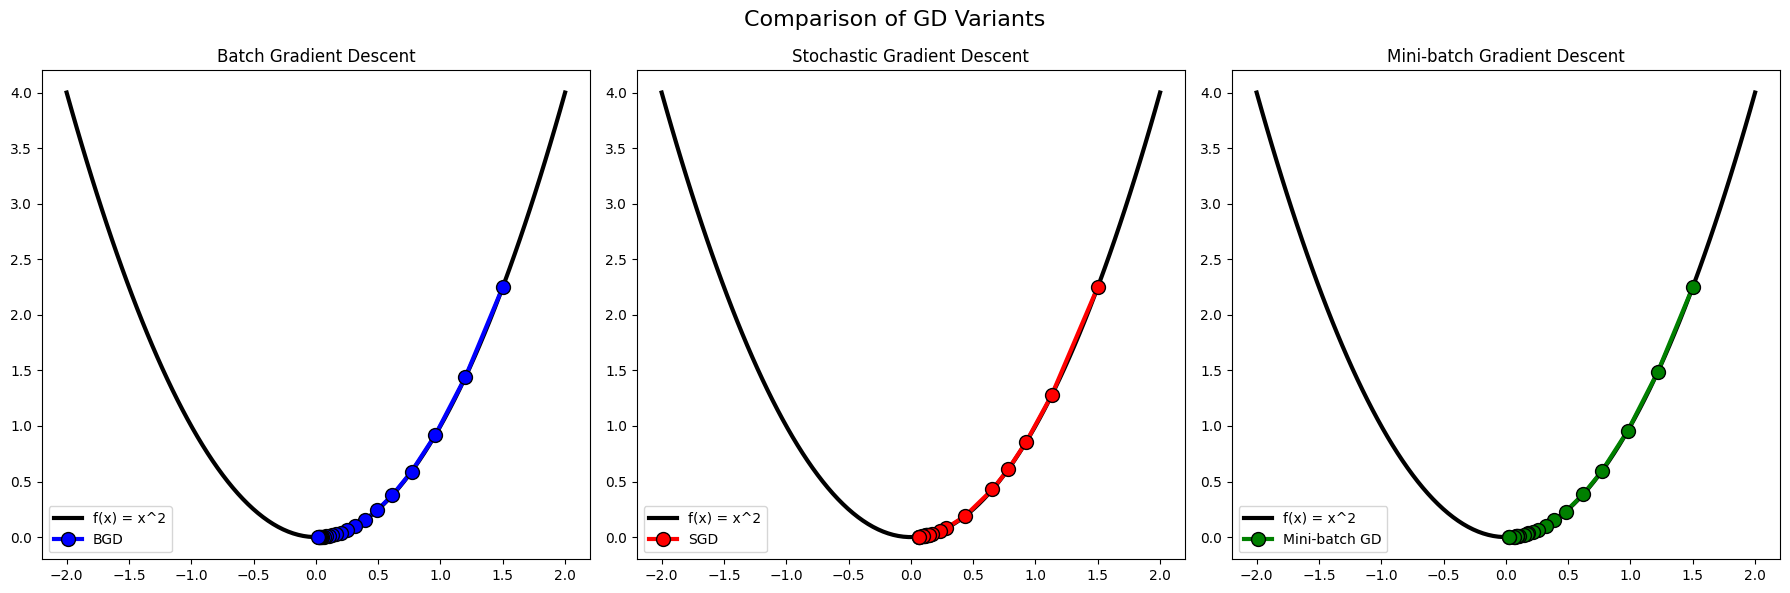

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def gradient(x):
    return 2*x

def gd_variant(start, lr, n_iter, batch_size, noise_level=0.5):
    x = start
    path = [x]
    for _ in range(n_iter):
        batch_gradients = [gradient(x) + np.random.normal(0, noise_level) for _ in range(batch_size)]
        avg_gradient = np.mean(batch_gradients)
        x = x - lr * avg_gradient
        path.append(x)
    return path

x = np.linspace(-2, 2, 100)

bgd_path = gd_variant(1.5, 0.1, 20, batch_size=100, noise_level=0)
sgd_path = gd_variant(1.5, 0.1, 20, batch_size=1)
mbgd_path = gd_variant(1.5, 0.1, 20, batch_size=10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparison of GD Variants', fontsize=16)

# Common plotting parameters
line_params = {'linewidth': 3, 'markersize': 10, 'markeredgecolor': 'black', 'markeredgewidth': 1}

# BGD subplot
ax1.plot(x, f(x), 'k-', linewidth=3, label='f(x) = x^2')
ax1.plot(bgd_path, [f(x) for x in bgd_path], 'bo-', label='BGD', **line_params)
ax1.legend()
ax1.set_title('Batch Gradient Descent')

# SGD subplot
ax2.plot(x, f(x), 'k-', linewidth=3, label='f(x) = x^2')
ax2.plot(sgd_path, [f(x) for x in sgd_path], 'ro-', label='SGD', **line_params)
ax2.legend()
ax2.set_title('Stochastic Gradient Descent')

# Mini-batch GD subplot
ax3.plot(x, f(x), 'k-', linewidth=3, label='f(x) = x^2')
ax3.plot(mbgd_path, [f(x) for x in mbgd_path], 'go-', label='Mini-batch GD', **line_params)
ax3.legend()
ax3.set_title('Mini-batch Gradient Descent')

plt.tight_layout()
plt.show()


### <a id='toc3_5_'></a>[Intuitive Example and Key Takeaways](#toc0_)


To understand mini-batch GD and its importance, let's revisit and extend our soup chef analogy:

Imagine our chef is now running a large restaurant chain and wants to optimize the soup recipe across all locations:

- **Mini-batch GD Approach**:
  - The chef makes a medium-sized pot of soup in each restaurant.
  - They ask a group of 10-20 customers at each location to taste and provide feedback.
  - The recipe is adjusted based on the average feedback from this group.
  - This process is repeated with different groups across different locations.


**Key Takeaways from this Approach**:

1. **Balance**: Mini-batch GD strikes a balance between the rapid adaptability of serving individual customers (SGD) and the stability of catering to all customers at once (BGD).
   - In machine learning, this translates to balancing between quick iterations and stable gradient estimates.

2. **Practical Efficiency**: By serving medium-sized groups, the chef can efficiently gather meaningful feedback without overwhelming the kitchen.
   - This mirrors how mini-batch GD efficiently processes data chunks, making it ideal for large datasets and deep learning.

3. **Diverse Feedback**: Different groups in various locations provide a more representative sample of preferences.
   - In ML, this helps in capturing diverse patterns in the data, potentially leading to better generalization.

4. **Adaptability with Stability**: The chef can adapt the recipe more quickly than waiting for all customers, but with more stability than changing it after each individual.
   - This reflects mini-batch GD's ability to adapt to data patterns while maintaining more stable convergence than SGD.

5. **Resource Management**: The kitchen can prepare and handle medium-sized pots more efficiently than either very large or very small batches.
   - Similarly, mini-batch GD often makes optimal use of computational resources, especially with GPU acceleration.


Understanding these principles of mini-batch gradient descent is crucial for effectively implementing and tuning modern machine learning algorithms, especially in deep learning contexts where it has become the de facto standard optimization method.

## <a id='toc4_'></a>[Momentum](#toc0_)

Momentum is a method that helps accelerate gradient descent in the relevant direction and dampens oscillations. It's particularly useful for dealing with high curvature, small but consistent gradients, or noisy gradients.


The momentum method introduces a velocity term that accumulates past gradients, acting like a ball rolling down a hill, gathering speed on the way.

**Algorithm:**
1. Initialize velocity vector v = 0
2. For each iteration:
   - Compute gradient: g = ∇J(θ)
   - Update velocity: v = γv - αg
   - Update parameters: θ = θ + v


Where:
- γ (gamma) is the momentum coefficient, typically set to 0.9 or 0.99
- α is the learning rate


### <a id='toc4_1_'></a>[Mathematical Representation](#toc0_)


The update rules for momentum can be expressed as:

$$
\begin{align*}
v_t &= \gamma v_{t-1} + \alpha \nabla J(\theta_{t-1}) \\
\theta_t &= \theta_{t-1} - v_t
\end{align*}
$$


### <a id='toc4_2_'></a>[Physics Analogy](#toc0_)


Imagine a ball rolling down a hill:
- The gradient is the slope of the hill.
- The velocity (v) is the speed and direction of the ball.
- Momentum (γ) determines how much the ball resists changes in its motion.


### <a id='toc4_3_'></a>[Advantages and Challenges](#toc0_)


1. **Faster Convergence**
   - ✅ Accelerates progress along dimensions with consistent gradients
   - ✅ Can lead to faster convergence than standard gradient descent
   - ❗ May overshoot the optimum if momentum is too high

2. **Handling Difficult Terrain**
   - ✅ Helps navigate ravines (areas where the surface curves much more steeply in one dimension than in another)
   - ✅ Can escape shallow local minima
   - ❗ Might struggle with sharp turns in the loss landscape

3. **Noise Reduction**
   - ✅ Smooths out the updates, reducing the impact of noisy gradients
   - ❗ Might be slower to respond to sudden changes in the gradient

4. **Hyperparameter Tuning**
   - ✅ Often works well with default momentum values (e.g., 0.9)
   - ❗ Introduces an additional hyperparameter to tune


### <a id='toc4_4_'></a>[Visualization](#toc0_)


Here's a simple visualization comparing gradient descent with and without momentum:


```python
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def gradient(x):
    return 2*x

def gd_with_momentum(start, lr, momentum, n_iter):
    x = start
    v = 0
    path = [x]
    for _ in range(n_iter):
        v = momentum * v - lr * gradient(x)
        x = x + v
        path.append(x)
    return path

x = np.linspace(-2, 2, 100)
plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'k-', label='f(x) = x^2')

gd_path = gd_with_momentum(1.5, 0.1, 0, 20)  # No momentum
momentum_path = gd_with_momentum(1.5, 0.1, 0.9, 20)  # With momentum

plt.plot(gd_path, [f(x) for x in gd_path], 'bo-', label='GD without Momentum')
plt.plot(momentum_path, [f(x) for x in momentum_path], 'ro-', label='GD with Momentum')

plt.legend()
plt.title('Comparison of GD with and without Momentum')
plt.show()
```


### <a id='toc4_5_'></a>[Intuitive Example and Key Takeaways](#toc0_)


Let's extend our chef analogy to understand momentum.

Imagine our chef is now adjusting the recipe based on customer feedback, but with a twist:

- **Momentum Approach**:
  - The chef keeps a record of past recipe adjustments.
  - When making a new adjustment, they consider both the current feedback and the trend of past adjustments.
  - If they've been consistently adding more salt over time, they'll be inclined to add a bit extra this time, even if the current feedback suggests only a small increase.


**Key Takeaways**:

1. **Accumulated Knowledge**: 
   - Momentum leverages information from past gradients, similar to how the chef uses the history of recipe changes.
   - This helps in making more informed decisions about parameter updates.

2. **Smoother Trajectory**:
   - By considering past adjustments, momentum smooths out the optimization process.
   - This is particularly helpful when dealing with noisy or inconsistent feedback (gradients).

3. **Escaping Local Optima**:
   - The "inertia" provided by momentum can help overcome small hills in the optimization landscape.
   - In our analogy, this might help the chef push through temporary negative feedback to reach a globally better recipe.

4. **Faster Convergence in Consistent Directions**:
   - Momentum accelerates progress along dimensions with consistent gradients.
   - For the chef, this means more rapid improvements in aspects of the recipe that consistently receive similar feedback.

5. **Careful Tuning Required**:
   - While momentum can greatly speed up learning, it needs careful tuning to avoid overshooting the optimum.
   - The chef needs to balance how much they rely on past trends versus current feedback.


Understanding momentum is crucial for implementing efficient optimization algorithms in machine learning. It forms the basis for many advanced optimization techniques and is particularly useful in navigating complex loss landscapes often encountered in deep learning.

## Other Variants of Gradient Descent

While we've covered the main variants of gradient descent (Batch, Stochastic, and Mini-batch), there are several other important variants and extensions that address specific challenges in optimization. Here's a brief overview of some of these variants:


1. **Momentum**
    - Concept: Adds a fraction of the previous update to the current update.
    - Benefit: Helps accelerate convergence and reduces oscillations.

2. **Nesterov Accelerated Gradient (NAG)**
    - Concept: A "look-ahead" version of momentum.
    - Benefit: Provides increased responsiveness, especially around areas of high curvature.

3. **Adagrad (Adaptive Gradient Algorithm)**
    - Concept: Adapts the learning rate to the parameters, performing smaller updates for frequent features.
    - Benefit: Works well with sparse data and eliminates the need to manually tune the learning rate.

4. **RMSprop (Root Mean Square Propagation)**
    - Concept: Adapts the learning rate for each parameter using a moving average of squared gradients.
    - Benefit: Addresses Adagrad's radically diminishing learning rates.

5. **Adam (Adaptive Moment Estimation)**
    - Concept: Combines ideas from momentum and RMSprop.
    - Benefit: Adapts learning rate for each parameter and has built-in bias correction.

6. **AdamW**
    - Concept: A modification of Adam that fixes weight decay regularization.
    - Benefit: Improves generalization and convergence in some scenarios.

7. **Gradient Descent with Line Search**
    - Concept: Dynamically adjusts step size at each iteration.
    - Benefit: Can lead to faster convergence by optimizing step size.


These advanced variants of gradient descent address various challenges encountered in optimization, such as:
- Adapting learning rates for different parameters
- Handling sparse data
- Dealing with noisy gradients
- Improving convergence speed and stability


Understanding these advanced variants is crucial for:
- Tackling complex optimization problems
- Training deep neural networks efficiently
- Choosing the right optimizer for specific machine learning tasks


As we progress, you'll gain insights into how these algorithms have revolutionized the training of large-scale machine learning models, particularly in deep learning applications.